In [16]:
import numpy as np
import keras
from keras import *

import matplotlib.pyplot as plt

RNG = np.random.default_rng(12345)

# setup

In [ ]:
period = 50.0
ts = np.sort(RNG.integers(-100, 100, size=(1000,)))

# generate features as Fourier series
num_sins = 10
amplitudes = RNG.integers(low=1, high=10, size = (1, num_sins))
x = np.zeros(shape=(num_sins, len(ts)))
for k in range(1,num_sins+1):
    x[k-1] = (-1)**k * np.sin(2 * np.pi * k * ts / period) / k + (RNG.uniform(-0.5, 0.5, size=ts.shape))
x = x.T * amplitudes

# generate sawtooth wave as target
y = 1*2*(ts/period - np.floor(0.5 + ts/period)) + (RNG.uniform(-0.05, 0.05, size=ts.shape))

oos_ts = np.sort(RNG.integers(100, 150, size=(len(ts)//50,)))
x_test = np.zeros(shape=(num_sins, len(oos_ts)))
for k in range(1,num_sins+1):
    x_test[k-1] = (-1)**k * np.sin(2 * np.pi * k * oos_ts / period) / k + (RNG.uniform(-0.5, 0.5, size=oos_ts.shape))
x_test = x_test.T * amplitudes
y_test = 1*2*(oos_ts/period - np.floor(0.5 + oos_ts/period)) + (RNG.uniform(-0.05, 0.05, size=oos_ts.shape))

# keras neural network model

In [17]:
model = keras.Sequential(
    layers = [
        keras.Input(shape=(10,), name = "sin_waves"), 
        keras.layers.Dense(16, activation='hard_sigmoid', name = "hidden1"),
        keras.layers.Dense(16, activation='hard_sigmoid', name = "hidden2"),
        keras.layers.Dense(1, activation='linear', name = "fitted_val")
    ],
    name = 'nn_test_model'
)

_ = model(x)

model.compile(
    optimizer = "rmsprop",
    loss = "mean_squared_error",
    metrics = "mean_squared_error"
)

print(model.summary())

training_history = model.fit(
    x, 
    y, 
    batch_size = x.shape[0]//10, 
    epochs = 300, 
    validation_split = 0.1,
)

Model: "nn_test_model"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 hidden1 (Dense)             (None, 16)                176       
                                                                 
 hidden2 (Dense)             (None, 16)                272       
                                                                 
 fitted_val (Dense)          (None, 1)                 17        
                                                                 
Total params: 465
Trainable params: 465
Non-trainable params: 0
_________________________________________________________________
None
Epoch 1/300
9/9 [==============================] - 1s 41ms/step - loss: 0.4022 - mean_squared_error: 0.4022 - val_loss: 0.3159 - val_mean_squared_error: 0.3159
Epoch 2/300
9/9 [==============================] - 0s 9ms/step - loss: 0.3489 - mean_squared_error: 0.3489 - val_loss: 0.2581 - val_mean_squared_error: 0.

In [18]:
preds_train = model(x)
preds_test = model(x_test)

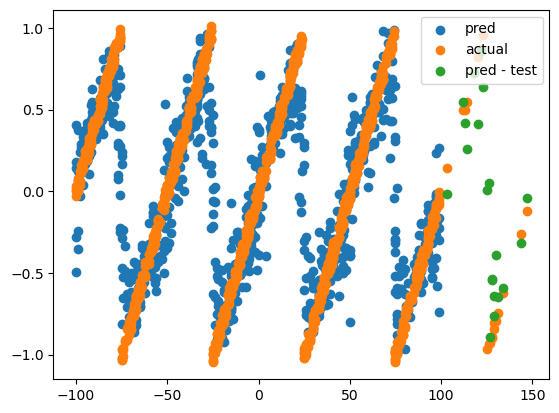

In [19]:
plt.scatter(ts, preds_train, label = 'pred')
plt.scatter(np.append(ts, oos_ts), np.append(y, y_test), label = 'actual')
plt.scatter(oos_ts, preds_test, label = 'pred - test')
plt.legend()
plt.show()